## 实验内容
决策树是机器学习中一种简单而又经典的算法。本次实验将带领了解决策树的基本原理，并学习使用 scikit-learn 来构建一个决策树分类模型，最后使用此模型预测鸢尾花的种类。

## 实验识点
- 决策树的基本原理;
- 学会使用python 和 sklearn 来编写决策树，利用ID3 算法建立决策树；
- 建立训练数据集和测试数据集的概念；


### 需要用到的几个库：
- pandas
- numpy
- sklearn
- graphviz
- matplotlib

## 基本操作

Enter：转入编辑模式

shift-Enter: 运行单元格，选中下一个单元格；

ctrl-Enter: 运行本单元格

Tab：代码补全

Shift-Tab： 提示


<img src="https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1588828184609&di=9132d462ee1ec75d821d78e5d247ed62&imgtype=0&src=http%3A%2F%2Fimg8.zol.com.cn%2Fbbs%2Fupload%2F22189%2F22188074.jpg">

<img src="http://5b0988e595225.cdn.sohucs.com/images/20190420/7563fe00488c4f69a1da1330b49e1595.jpeg">

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris_feature=iris.data
iris_target=iris.target
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
import pandas as pd
features=pd.DataFrame(iris.data,columns=iris.feature_names)
target=pd.DataFrame(iris.target, columns=['class'])

In [3]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test= train_test_split(iris_feature, iris_target, test_size=0.2, random_state=8)
pd.DataFrame(feature_train)

,0,1,2,3
0,5.1,3.8,1.9,0.4
1,4.8,3.0,1.4,0.1
2,4.6,3.6,1.0,0.2
3,6.7,3.3,5.7,2.1
4,5.5,2.6,4.4,1.2
...,...,...,...,...
115,6.0,2.7,5.1,1.6
116,6.3,3.4,5.6,2.4
117,6.3,2.8,5.1,1.5
118,7.6,3.0,6.6,2.1


In [4]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy")

In [23]:
model.fit(feature_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test,model.predict(feature_test))

0.8666666666666667

In [25]:
accuracy_score(target_train,model.predict(feature_train))

1.0

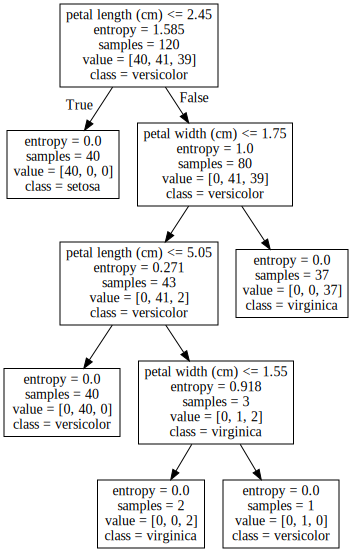

In [7]:
import graphviz
from sklearn.tree import export_graphviz
DTree= export_graphviz(model, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graphviz.Source(DTree)

In [26]:
model2= DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [27]:
model2.fit(feature_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
accuracy_score(target_train,model2.predict(feature_train))

0.9916666666666667

In [30]:
119/120

0.9916666666666667

In [28]:
accuracy_score(target_test,model2.predict(feature_test))

0.9

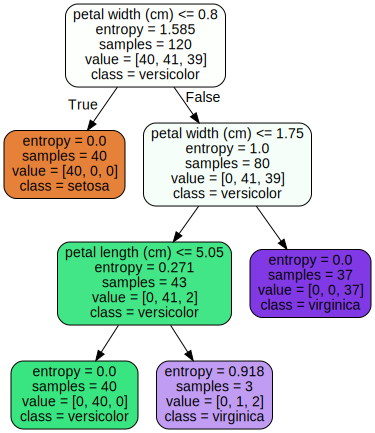

In [13]:
DTree2= export_graphviz(model2, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names,filled=True,rounded=True)
graphviz.Source(DTree2)

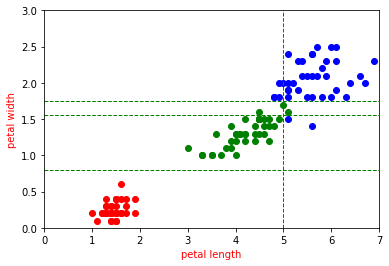

In [32]:
from matplotlib import pyplot as plt
plt.xlim(0,7)
plt.ylim(0,3)
data = feature_train
data1= target_train

for i in range(len(data)):
    if data1[i]==0:
        plt.scatter(data[i][2],data[i][3],c='r')
    if data1[i]==1:
        plt.scatter(data[i][2],data[i][3],c='g')
    if data1[i]==2:
        plt.scatter(data[i][2],data[i][3],c='b')

plt.xlabel('petal length',color='r')
plt.ylabel('petal width',color='r')
plt.axhline(y=0.8,c='g',ls='--',lw='1')
plt.axhline(y=1.75,c='g',ls='--',lw='1') 
plt.axvline(x=5.0,color='g',ls='--',lw='1')
plt.axhline(y=1.55,c='g',ls='--',lw='1')

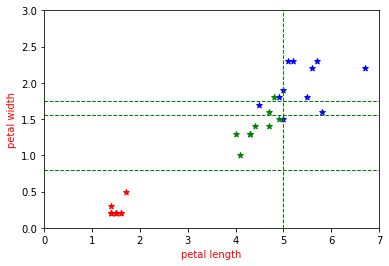

In [33]:
from matplotlib import pyplot as plt
plt.xlim(0,7)
plt.ylim(0,3)
data = feature_test
data1= target_test

for i in range(len(data)):
    if data1[i]==0:
        plt.scatter(data[i][2],data[i][3],c='r', marker="*")
    if data1[i]==1:
        plt.scatter(data[i][2],data[i][3],c='g', marker="*")
    if data1[i]==2:
        plt.scatter(data[i][2],data[i][3],c='b', marker="*"
                   )

plt.xlabel('petal length',color='r')
plt.ylabel('petal width',color='r')
plt.axhline(y=0.8,c='g',ls='--',lw='1')
plt.axhline(y=1.75,c='g',ls='--',lw='1') 
plt.axvline(x=5.0,color='g',ls='--',lw='1')
plt.axhline(y=1.55,c='g',ls='--',lw='1')

In [2]:
# 导入新的数据
import pandas as pd
import numpy as np
new_data=pd.read_csv("Irisdata for training.csv" )
data=np.array(new_data)

feature_data=np.array(new_data.iloc[:,0:4])
target_data=np.array(new_data.iloc[:,-1])
accuracy_score(target_data,model.predict(feature_data))

In [ ]:
#数据可视化
plt.xlim(0,7)
plt.ylim(0,3)
data = feature_data
data1= target_data

for i in range(len(data)):
    if data1[i]==0:
        plt.scatter(data[i][2],data[i][3],c='r')
    if data1[i]==1:
        plt.scatter(data[i][2],data[i][3],c='g')
    if data1[i]==2:
        plt.scatter(data[i][2],data[i][3],c='b')

plt.xlabel('petal length',color='r')
plt.ylabel('petal width',color='r')

plt.axhline(y=0.8,c='g',ls='--',lw='1')
plt.axhline(y=1.7,c='g',ls='--',lw='1') 
plt.axvline(x=5.0,color='g',ls='--',lw='1')
plt.axhline(y=1.55,c='g',ls='--',lw='1')